# Figures showing dynamics

In [69]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import itertools
import WormFunctions as wrm
import seaborn as sns

from importlib import reload 
sns.set_theme(style='white')

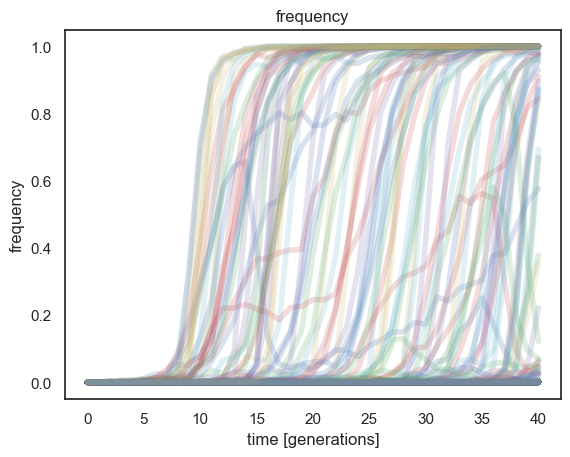

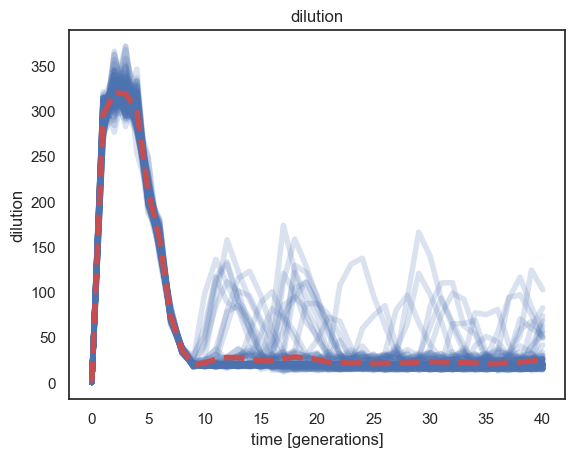

In [71]:
N=200 # 1000 or 2000
name='NewJacqExp/NewJacqExp'+str(N)

R=100
for i in range (R):
    this_name=name+'_i'+str(i)
    frequency=np.load(this_name+'frequency.npy')
    plt.plot(frequency[:,0], 'r',linewidth=4, alpha=0.2)
    plt.plot(frequency[:,1], 'g',linewidth=4, alpha=0.2)
    plt.plot(frequency[:,2], 'b',linewidth=4, alpha=0.2)
    plt.plot(frequency[:,3], 'y',linewidth=4, alpha=0.2)
    plt.plot(frequency[:,4], 'm',linewidth=4, alpha=0.2)
    plt.plot(frequency[:,5], 'c',linewidth=4, alpha=0.2)
plt.ylabel('frequency')
plt.xlabel('time [generations]')
plt.title('frequency')
plt.show()

value=np.zeros([41])
for i in range (R):
    this_name=name+'_i'+str(i)
    dilution=np.load(this_name+'dilution.npy')  
    value=value+dilution
    plt.plot(dilution, 'b',linewidth=4, alpha=0.2)
plt.plot(value/R, 'r--',linewidth=4 )
plt.title('dilution')
plt.ylabel('dilution')
plt.xlabel('time [generations]')
plt.show()

## Get all concentration data

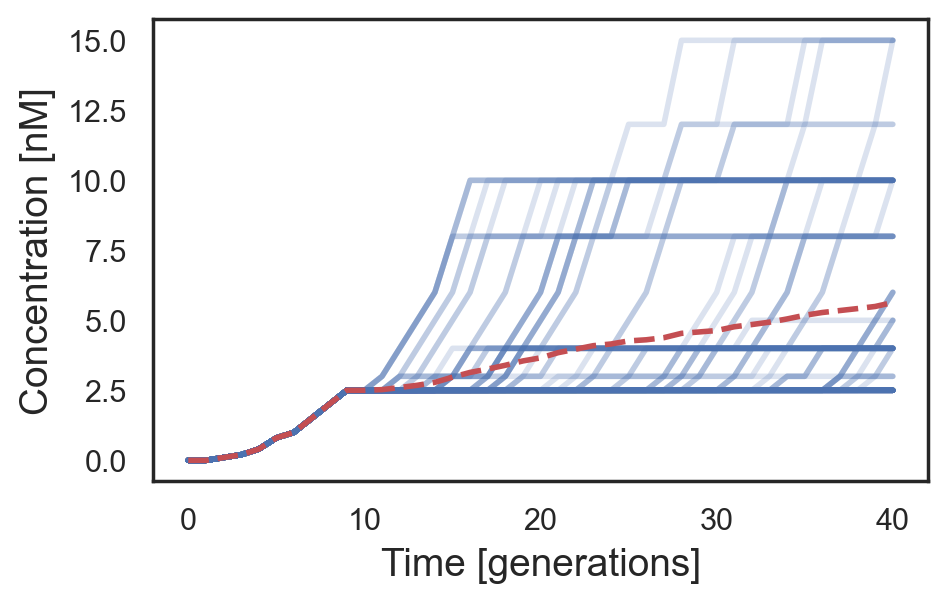

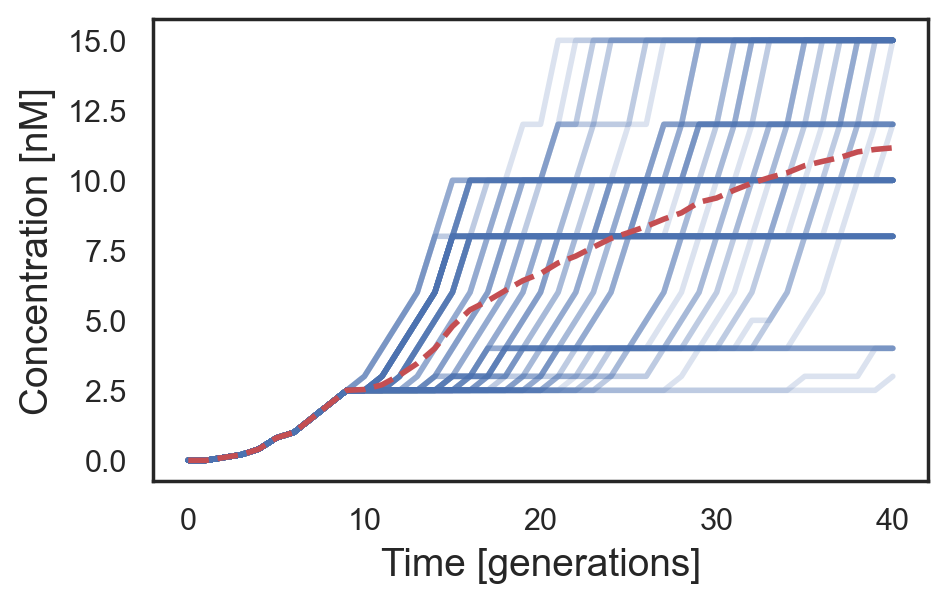

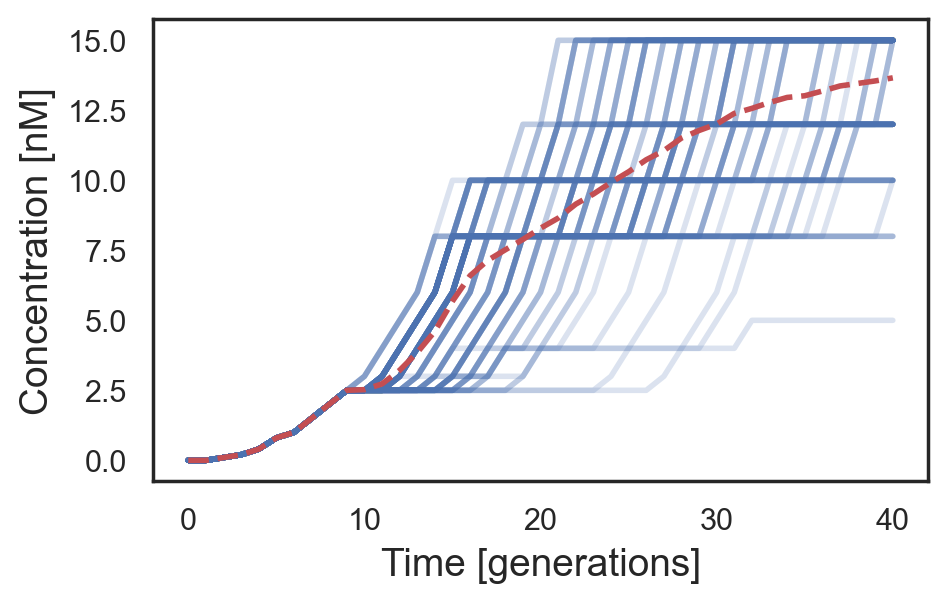

In [75]:

N=200  
name='NewJacqExp/NewJacqExp'+str(N)

R=100
conc_array=[]
value=np.zeros([41])
final_conc=np.empty([R])
fig, ax = plt.subplots(dpi=200, figsize=(5, 3))
for i in range (R):
    this_name=name+'_i'+str(i)
    concentration=np.load(this_name+'concentration.npy')  
    value=value+concentration
    conc_array.append(concentration)
    
    final_conc[i]=concentration[-1]
    plt.plot(concentration, 'b',linewidth=2, alpha=0.2)
plt.ylabel('Concentration [nM]', fontsize=14)
plt.xlabel('Time [generations]', fontsize=14)
plt.plot(value/R, 'r--',linewidth=2 )
plt.savefig(name+'concentrationAllFinal.png',bbox_inches='tight')
plt.show()

conc_array_200=np.array(conc_array)
A200=value/R
final_conc200=final_conc

#### Same for 1000 
N=1000 
name='NewJacqExp/NewJacqExp'+str(N)

R=100
conc_array=[]
value=np.zeros([41])
final_conc=np.empty([R])
fig, ax = plt.subplots(dpi=200, figsize=(5, 3))
for i in range (R):
    this_name=name+'_i'+str(i)
    concentration=np.load(this_name+'concentration.npy')  
    value=value+concentration
    conc_array.append(concentration)
    
    final_conc[i]=concentration[-1]
    plt.plot(concentration, 'b',linewidth=2, alpha=0.2)
plt.ylabel('Concentration [nM]', fontsize=14)
plt.xlabel('Time [generations]', fontsize=14)
plt.plot(value/R, 'r--',linewidth=2 )
plt.savefig(name+'concentrationAllFinal.png',bbox_inches='tight')
plt.show()
conc_array_1000=np.array(conc_array)
A1000=value/R
final_conc1000=final_conc


#### Same for 2000 
N=2000 
name='NewJacqExp/NewJacqExp'+str(N)


conc_array=[]
value=np.zeros([41])
final_conc=np.empty([R])
fig, ax = plt.subplots(dpi=200, figsize=(5, 3))
for i in range (R):
    this_name=name+'_i'+str(i)
    concentration=np.load(this_name+'concentration.npy')  
    value=value+concentration
    conc_array.append(concentration)
    
    final_conc[i]=concentration[-1]
    plt.plot(concentration, 'b',linewidth=2, alpha=0.2)
plt.ylabel('Concentration [nM]', fontsize=14)
plt.xlabel('Time [generations]', fontsize=14)
plt.plot(value/R, 'r--',linewidth=2 )
plt.savefig(name+'concentrationAllFinal.png',bbox_inches='tight')
plt.show()
conc_array_2000=np.array(conc_array)
A2000=value/R
final_conc2000=final_conc

## Histogram of final concenrations

In [77]:
Y200=final_conc200.copy()
Y1000=final_conc1000.copy()
Y2000=final_conc2000.copy()

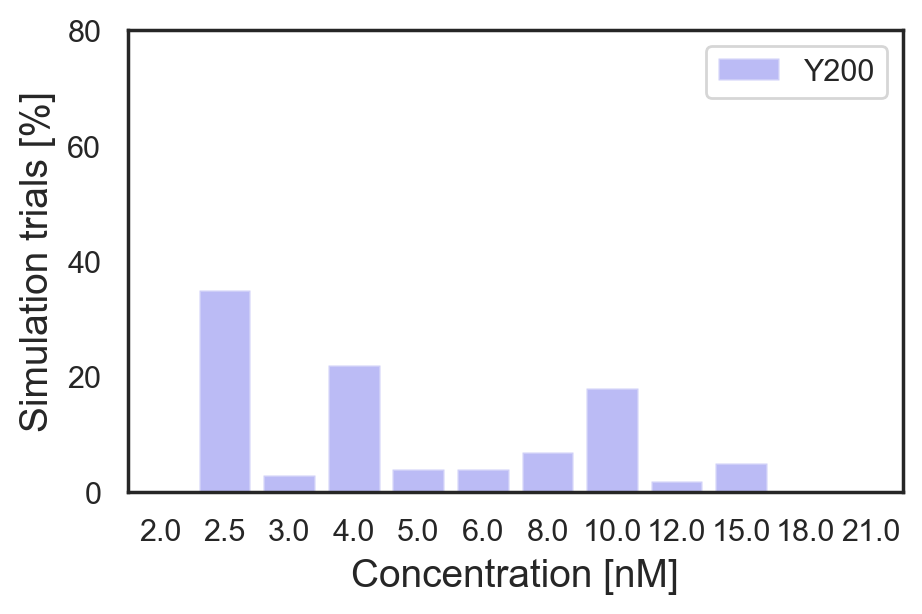

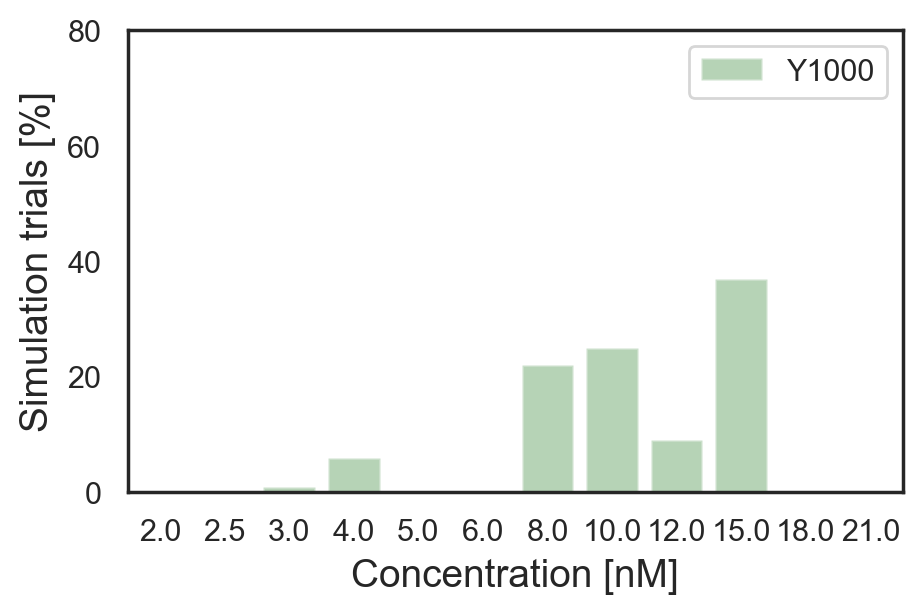

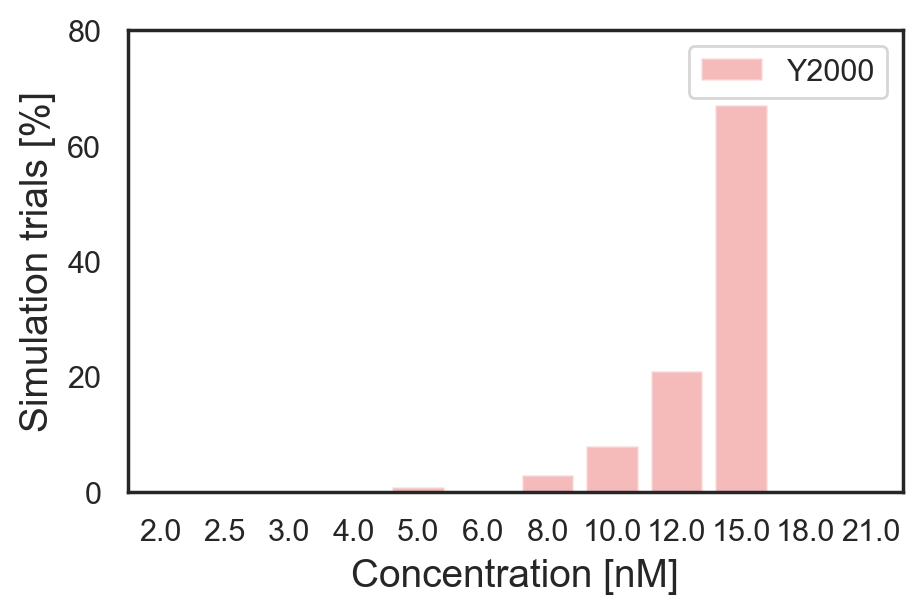

In [78]:
concentration_gradient=[2,2.5,3,4,5,6,8,10,12,15, 18, 21]


# Plot bar charts for each dataset with specified colors
fig, ax = plt.subplots(dpi=200, figsize=(5, 3))
sns.countplot(x=Y200, order=concentration_gradient, stat='percent', color='blue',label='Y200', alpha=0.3)
plt.xlabel('Concentration [nM]', fontsize=14)
plt.ylabel('Simulation trials [%]', fontsize=14)
plt.ylim([0,80])
plt.savefig(name+'Hist200.png',dpi=200, bbox_inches='tight')

fig, ax = plt.subplots(dpi=200, figsize=(5, 3))
sns.countplot(x=Y1000, order=concentration_gradient,stat='percent', color='green', label='Y1000', alpha=0.3)
plt.xlabel('Concentration [nM]', fontsize=14)
plt.ylabel('Simulation trials [%]', fontsize=14)
plt.ylim([0,80])
plt.savefig(name+'Hist1000.png',dpi=200, bbox_inches='tight')

fig, ax = plt.subplots(dpi=200, figsize=(5, 3))
sns.countplot(x=Y2000, order=concentration_gradient,stat='percent', color='red', label='Y2000',  alpha=0.3)
plt.xlabel('Concentration [nM]', fontsize=14)
plt.ylabel('Simulation trials [%]', fontsize=14)
plt.ylim([0,80])
plt.savefig(name+'Hist2000.png',dpi=200, bbox_inches='tight')

# Set legend
plt.legend()

In [81]:
## Overal figures combining all 

In [82]:
mean_values200 = np.mean(conc_array_200, axis=0)
std_deviation200 = np.std(conc_array_200, axis=0)
mean_values1000 = np.mean(conc_array_1000, axis=0)
std_deviation1000 = np.std(conc_array_1000, axis=0)
mean_values2000 = np.mean(conc_array_2000, axis=0)
std_deviation2000 = np.std(conc_array_2000, axis=0)

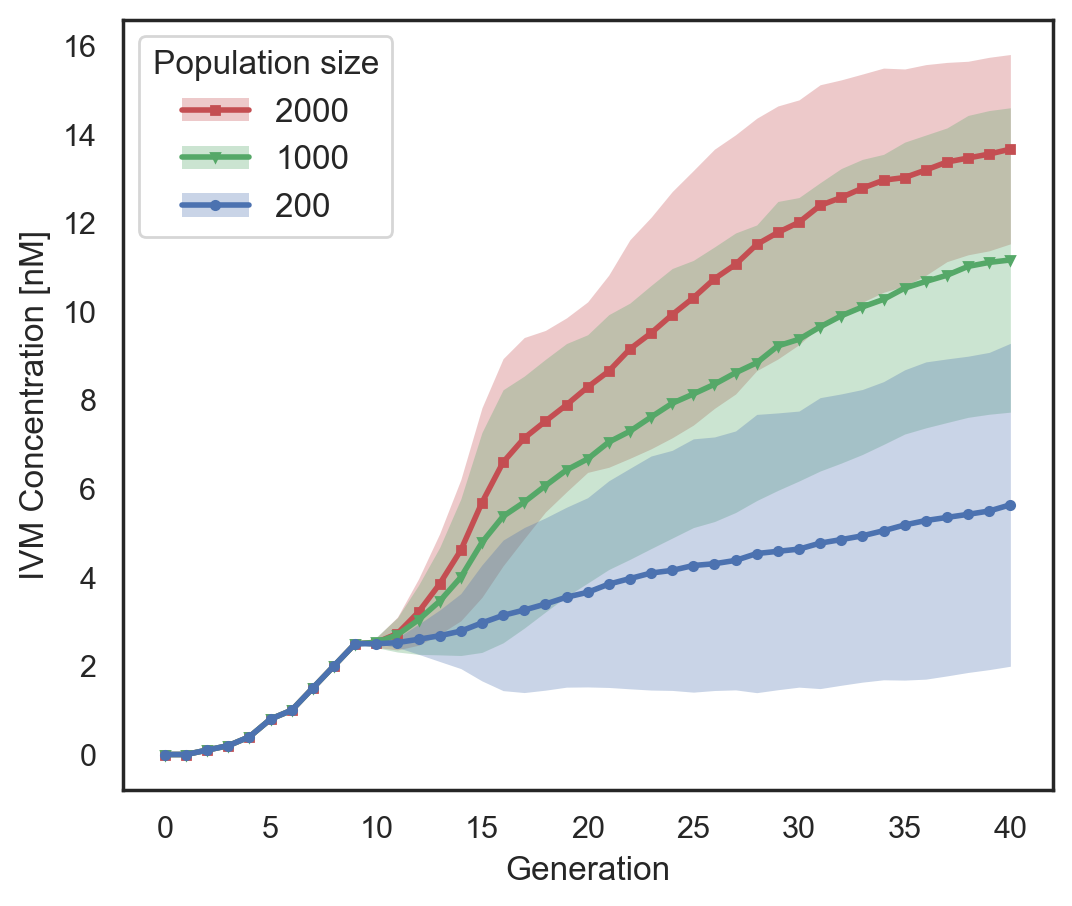

In [83]:
#name='NewJacqExp/NewJacqExp'

sns.set_theme(style='white')
n=41

fig1, ax1 = plt.subplots(dpi=200, figsize=(6, 5))
#plt.title('Mathematical modelling of ivermectin resistance evolution in C. elegans', fontsize=16)
line2000, =plt.plot(range(n),mean_values2000, '-rs',linewidth=2,markersize=3 )
fill2000 =plt.fill_between(range(n), mean_values2000 - std_deviation2000, mean_values2000 + std_deviation2000, alpha=0.3, color='r', linewidth=0, label='Standard Deviation')

line1000, =plt.plot(range(n),mean_values1000, '-v', color='g',linewidth=2,markersize=3 )
fill1000=plt.fill_between(range(n), mean_values1000 - std_deviation1000, mean_values1000 + std_deviation1000, alpha=0.3, color='g', linewidth=0, label='Standard Deviation')

line200,=plt.plot(range(n),mean_values200, '-o', color='b',linewidth=2,markersize=3 )
fill200=plt.fill_between(range(n), mean_values200 - std_deviation200, mean_values200 + std_deviation200, alpha=0.3,color='b',  linewidth=0,label='Standard Deviation')


# Fill between the lines for standard deviation

#

plt.ylabel('IVM Concentration [nM]', fontsize=12)
plt.xlabel('Generation', fontsize=12)
plt.legend([(line2000, fill2000), (line1000, fill1000),(line200, fill200)], ['2000', '1000', '200'],title='Population size', fontsize=12)
plt.savefig(name+'AllIvermectinFinal.png',dpi=200, bbox_inches='tight')
plt.show()

# Same for extended version

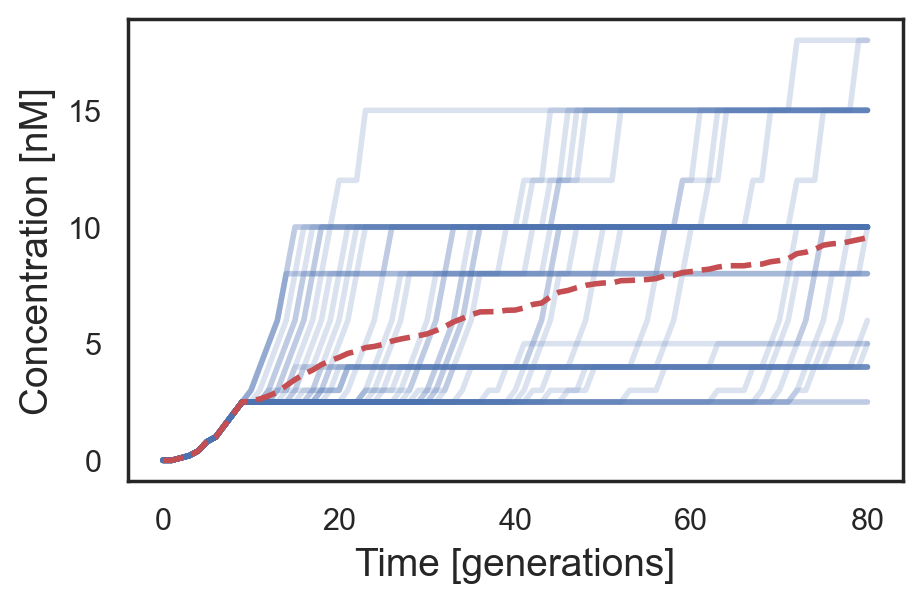

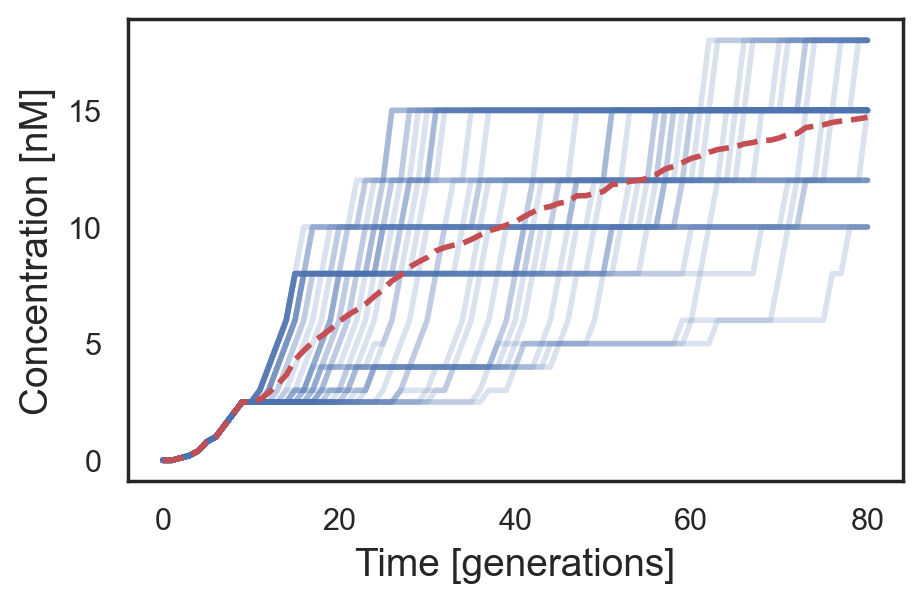

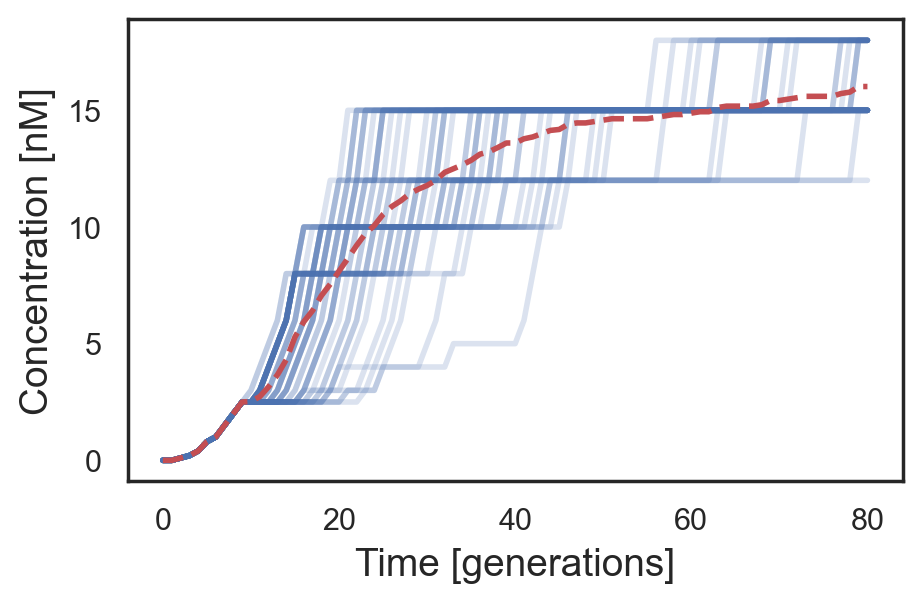

In [89]:

N=200  
name='ExtendedJacqExp/ExtendedJacqExp'+str(N)

R=50
conc_array=[]
value=np.zeros([81])
final_conc=np.empty([R])
fig, ax = plt.subplots(dpi=200, figsize=(5, 3))
for i in range (R):
    this_name=name+'_i'+str(i)
    concentration=np.load(this_name+'concentration.npy')  
    value=value+concentration
    conc_array.append(concentration)
    
    final_conc[i]=concentration[-1]
    plt.plot(concentration, 'b',linewidth=2, alpha=0.2)
plt.ylabel('Concentration [nM]', fontsize=14)
plt.xlabel('Time [generations]', fontsize=14)
plt.plot(value/R, 'r--',linewidth=2 )
plt.savefig(name+'concentrationAllFinal.png',bbox_inches='tight')
plt.show()

conc_array_200=np.array(conc_array)
A200=value/R
final_conc200=final_conc

#### Same for 1000 
N=1000 
name='ExtendedJacqExp/ExtendedJacqExp'+str(N)
conc_array=[]
value=np.zeros([81])
final_conc=np.empty([R])
fig, ax = plt.subplots(dpi=200, figsize=(5, 3))
for i in range (R):
    this_name=name+'_i'+str(i)
    concentration=np.load(this_name+'concentration.npy')  
    value=value+concentration
    conc_array.append(concentration)
    
    final_conc[i]=concentration[-1]
    plt.plot(concentration, 'b',linewidth=2, alpha=0.2)
plt.ylabel('Concentration [nM]', fontsize=14)
plt.xlabel('Time [generations]', fontsize=14)
plt.plot(value/R, 'r--',linewidth=2 )
plt.savefig(name+'concentrationAllFinal.png',bbox_inches='tight')
plt.show()
conc_array_1000=np.array(conc_array)
A1000=value/R
final_conc1000=final_conc


#### Same for 2000 
N=2000 
name='ExtendedJacqExp/ExtendedJacqExp'+str(N)


conc_array=[]
value=np.zeros([81])
final_conc=np.empty([R])
fig, ax = plt.subplots(dpi=200, figsize=(5, 3))
for i in range (R):
    this_name=name+'_i'+str(i)
    concentration=np.load(this_name+'concentration.npy')  
    value=value+concentration
    conc_array.append(concentration)
    
    final_conc[i]=concentration[-1]
    plt.plot(concentration, 'b',linewidth=2, alpha=0.2)
plt.ylabel('Concentration [nM]', fontsize=14)
plt.xlabel('Time [generations]', fontsize=14)
plt.plot(value/R, 'r--',linewidth=2 )
plt.savefig(name+'concentrationAllFinal.png',bbox_inches='tight')
plt.show()
conc_array_2000=np.array(conc_array)
A2000=value/R
final_conc2000=final_conc

In [90]:
Y200=final_conc200.copy()
Y1000=final_conc1000.copy()
Y2000=final_conc2000.copy()

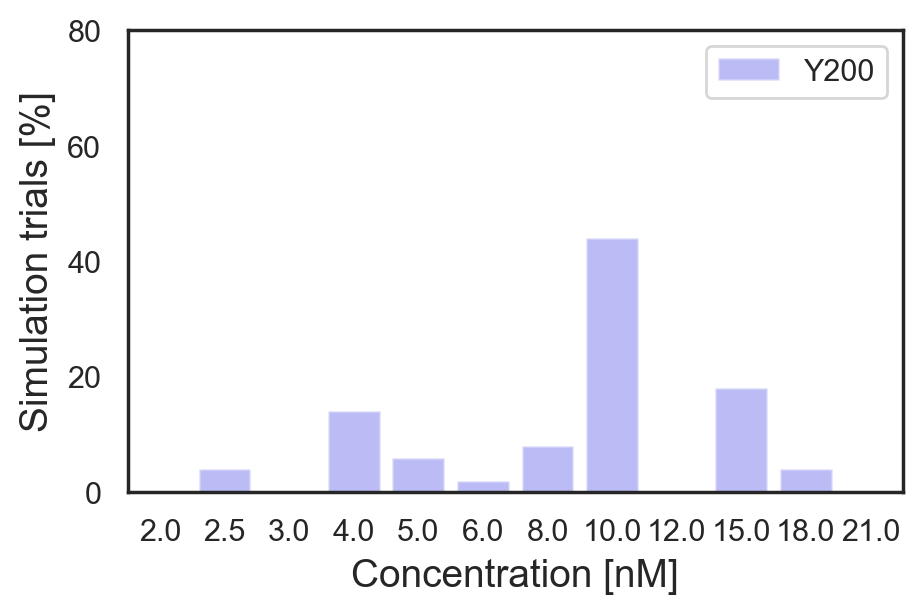

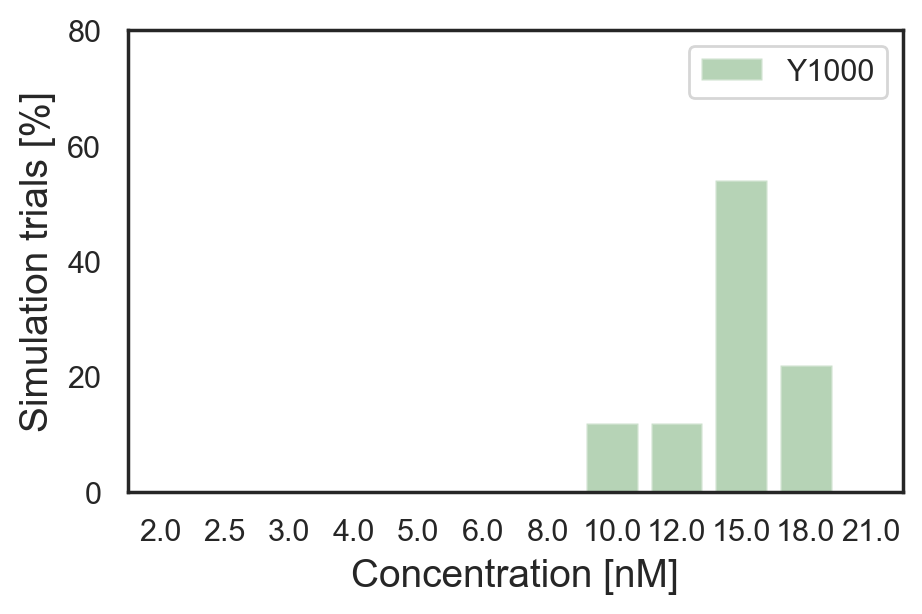

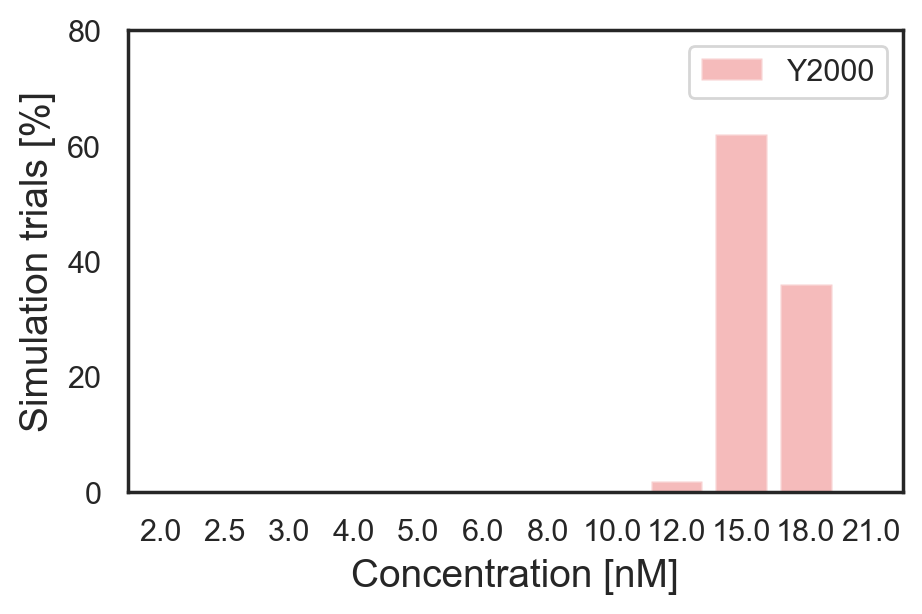

In [91]:
concentration_gradient=[2,2.5,3,4,5,6,8,10,12,15, 18, 21]


# Plot bar charts for each dataset with specified colors
fig, ax = plt.subplots(dpi=200, figsize=(5, 3))
sns.countplot(x=Y200, order=concentration_gradient, stat='percent', color='blue',label='Y200', alpha=0.3)
plt.xlabel('Concentration [nM]', fontsize=14)
plt.ylabel('Simulation trials [%]', fontsize=14)
plt.ylim([0,80])
plt.savefig(name+'Hist200.png',dpi=200, bbox_inches='tight')

fig, ax = plt.subplots(dpi=200, figsize=(5, 3))
sns.countplot(x=Y1000, order=concentration_gradient,stat='percent', color='green', label='Y1000', alpha=0.3)
plt.xlabel('Concentration [nM]', fontsize=14)
plt.ylabel('Simulation trials [%]', fontsize=14)
plt.ylim([0,80])
plt.savefig(name+'Hist1000.png',dpi=200, bbox_inches='tight')

fig, ax = plt.subplots(dpi=200, figsize=(5, 3))
sns.countplot(x=Y2000, order=concentration_gradient,stat='percent', color='red', label='Y2000',  alpha=0.3)
plt.xlabel('Concentration [nM]', fontsize=14)
plt.ylabel('Simulation trials [%]', fontsize=14)
plt.ylim([0,80])
plt.savefig(name+'Hist2000.png',dpi=200, bbox_inches='tight')

# Set legend
plt.legend()

In [94]:
mean_values200 = np.mean(conc_array_200, axis=0)
std_deviation200 = np.std(conc_array_200, axis=0)
mean_values1000 = np.mean(conc_array_1000, axis=0)
std_deviation1000 = np.std(conc_array_1000, axis=0)
mean_values2000 = np.mean(conc_array_2000, axis=0)
std_deviation2000 = np.std(conc_array_2000, axis=0)

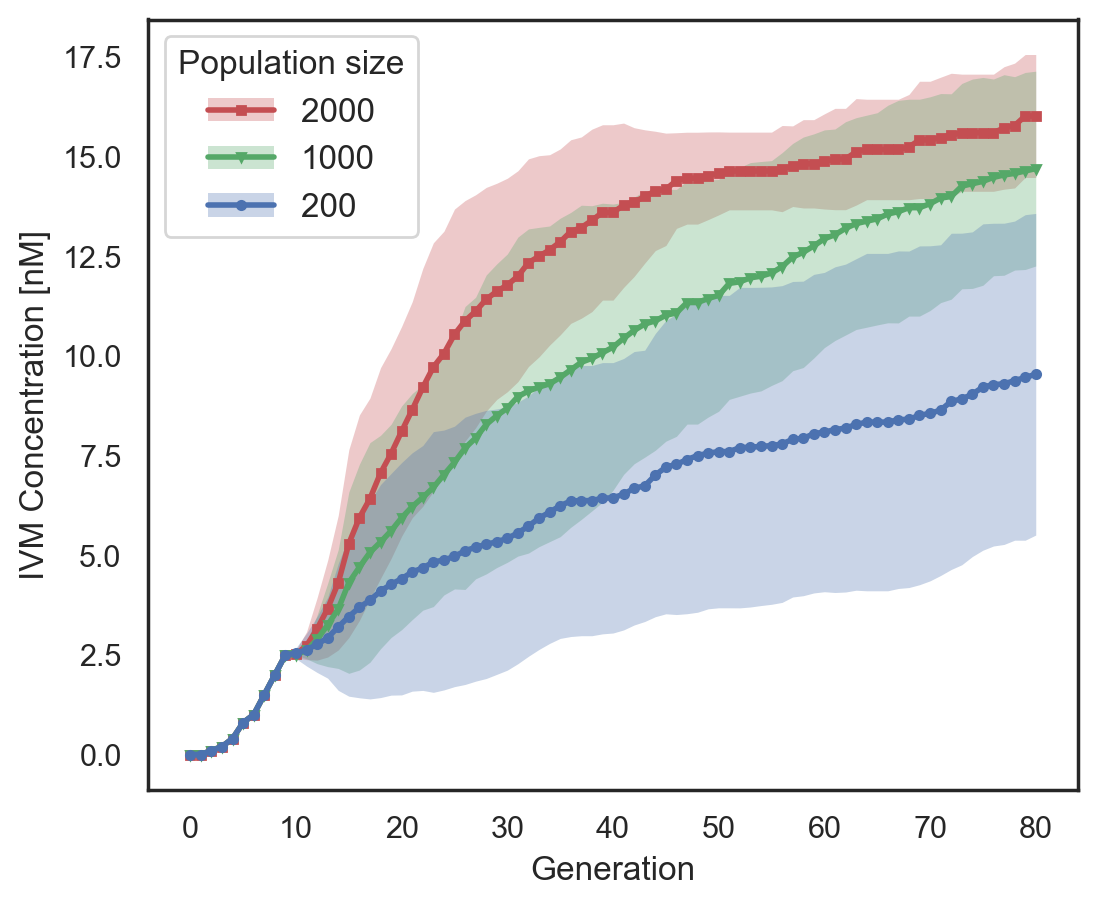

In [95]:
#name='NewJacqExp/NewJacqExp'

sns.set_theme(style='white')
n=81

fig1, ax1 = plt.subplots(dpi=200, figsize=(6, 5))
#plt.title('Mathematical modelling of ivermectin resistance evolution in C. elegans', fontsize=16)
line2000, =plt.plot(range(n),mean_values2000, '-rs',linewidth=2,markersize=3 )
fill2000 =plt.fill_between(range(n), mean_values2000 - std_deviation2000, mean_values2000 + std_deviation2000, alpha=0.3, color='r', linewidth=0, label='Standard Deviation')

line1000, =plt.plot(range(n),mean_values1000, '-v', color='g',linewidth=2,markersize=3 )
fill1000=plt.fill_between(range(n), mean_values1000 - std_deviation1000, mean_values1000 + std_deviation1000, alpha=0.3, color='g', linewidth=0, label='Standard Deviation')

line200,=plt.plot(range(n),mean_values200, '-o', color='b',linewidth=2,markersize=3 )
fill200=plt.fill_between(range(n), mean_values200 - std_deviation200, mean_values200 + std_deviation200, alpha=0.3,color='b',  linewidth=0,label='Standard Deviation')


# Fill between the lines for standard deviation

#

plt.ylabel('IVM Concentration [nM]', fontsize=12)
plt.xlabel('Generation', fontsize=12)
plt.legend([(line2000, fill2000), (line1000, fill1000),(line200, fill200)], ['2000', '1000', '200'],title='Population size', fontsize=12)
plt.savefig(name+'AllIvermectinFinal.png',dpi=200, bbox_inches='tight')
plt.show()